<a href="https://colab.research.google.com/github/migue212852/SistemaSalud/blob/main/An%C3%A1lisis_Casos_de_Dengue_en_Arg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

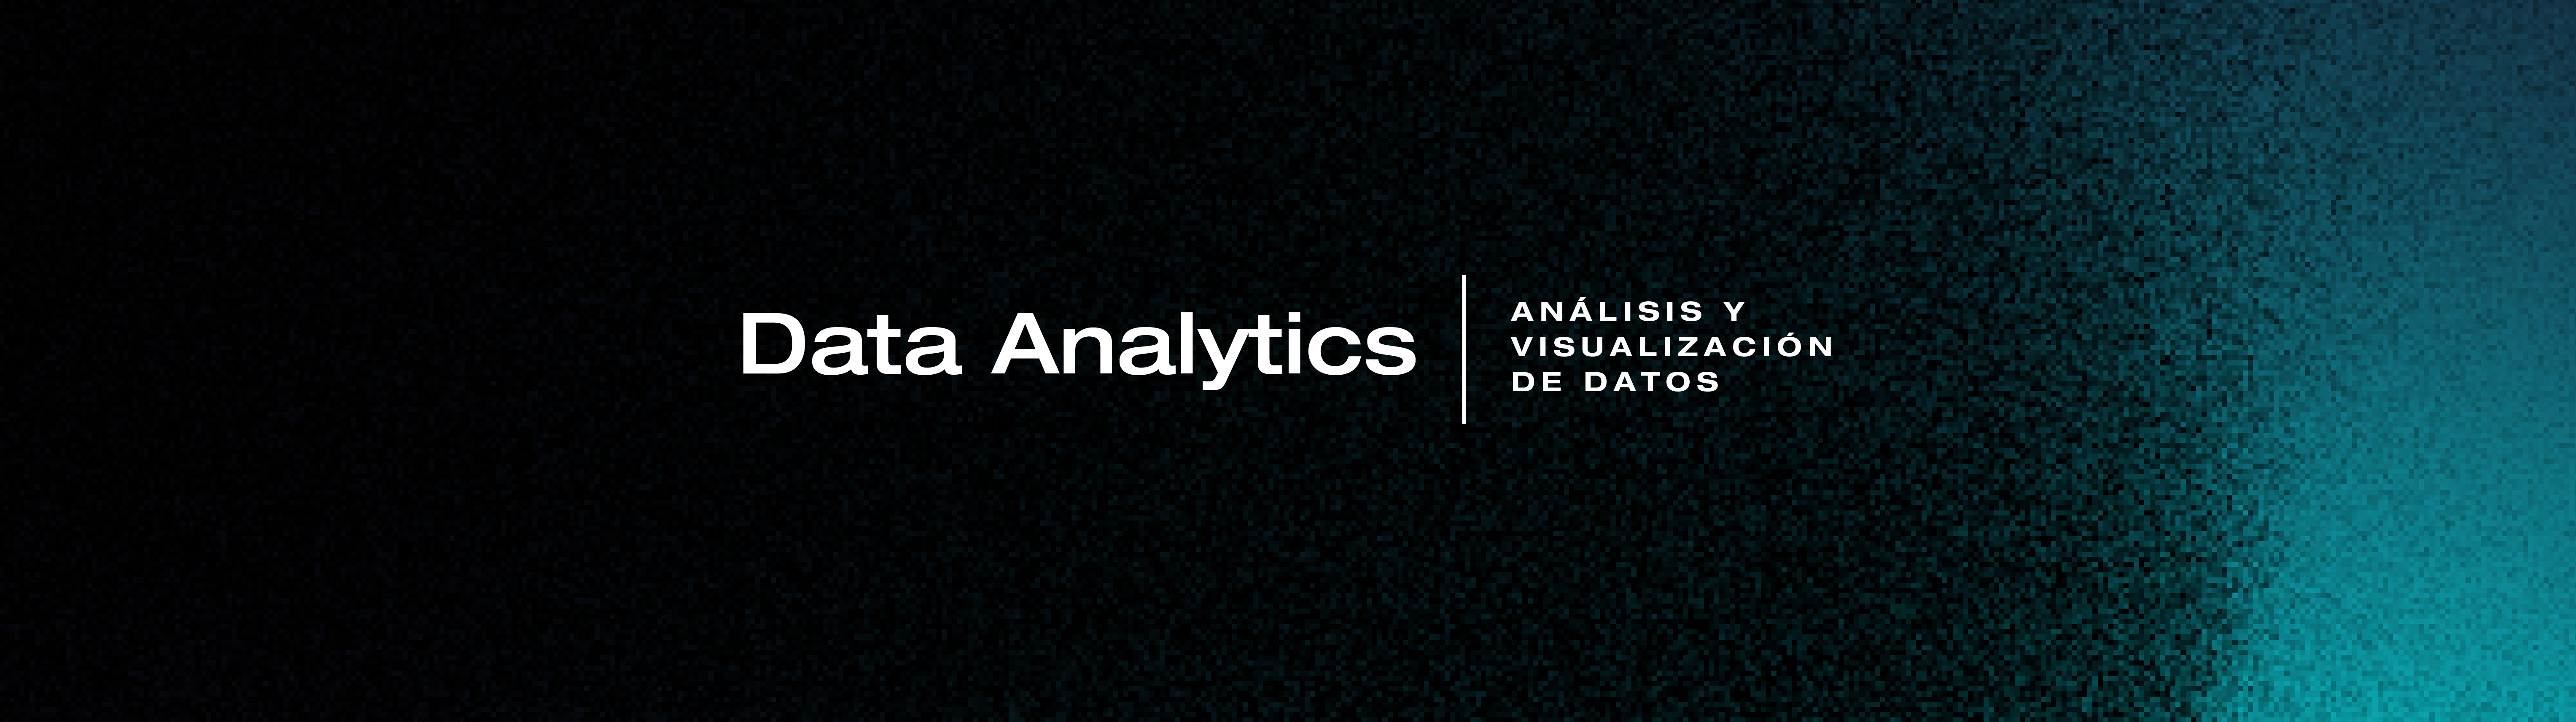

# **Reyes Miguel**- Tecnicatura en Desarrollo de Software

**Base de datos de acceso publica**

Sitio web:
- [https://datos.gob.ar/dataset/salud-vigilancia-enfermedades-por-virus-dengue-zika](https://https://datos.gob.ar/dataset/salud-vigilancia-enfermedades-por-virus-dengue-zika)-

- [repositorio](https://http://datos.salud.gob.ar/dataset/vigilancia-de-dengue-y-zika/archivo/bdd4e662-42cf-47ee-b7b3-bc14f5acae2d)

Ministerio de Salud. Secretaría de Promoción de la Salud, Prevención y Control de Riesgos. Subsecretaría de Prevención y Control de Enfermedades Comunicables e Inmunoprevenibles. Dirección Nacional de Epidemiología y Análisis de la Situación de Salud. Área de Vigilancia.

# Libreria complementaria usanfo Google Drive

In [ ]:
'''
# Se puede montar el dataset a tavés de google drive
from google.colab import auth
auth.authenticate_user()

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials


gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link1 = 'https://drive.google.com/file/d/1jUEDtjyKyBnRq5ikhayp2kfNe30IgZAm/view?usp=sharing'


id = link1.split("/")[-2]


downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('dataset- dengue-salud.csv')
'''


## Librerías

In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import mode

sns.set_context('notebook', font_scale=1.2)

In [2]:
# Leer el archivo CSV especificando el delimitador ';'
url="https://github.com/migue212852/SistemaSalud/raw/refs/heads/main/dataset_dengue_salud_gral.csv"
df = pd.read_csv(url, encoding='latin1', sep=';')
# Mostrar las primeras filas del DataFrame
df.head()


,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
0,0,*sin dato*,6,Buenos Aires,2018,11,Dengue,10,De 45 a 64 años,1.0
1,035,Avellaneda,6,Buenos Aires,2018,7,Dengue,8,De 20 a 24 años,1.0
2,035,Avellaneda,6,Buenos Aires,2018,7,Dengue,10,De 45 a 64 años,1.0
3,035,Avellaneda,6,Buenos Aires,2018,9,Dengue,6,De 10 a 14 años,1.0
4,035,Avellaneda,6,Buenos Aires,2018,9,Dengue,8,De 20 a 24 años,1.0


# Información genereal del dataset: "Dengue Salud"

### Abstract del Conjunto de Datos de Dengue en Argentina

Este conjunto de datos contiene información epidemiológica relacionada con los casos de dengue en Argentina desde el segundo semestre de 2018 y enero de 2025, organizada por variables geográficas, temporales, demográficas y de eventos sanitarios. Su propósito principal es proporcionar una base sólida para el análisis de la distribución y evolución del dengue en diferentes regiones del país, permitiendo identificar tendencias, patrones y factores de riesgo.

#### Descripción de las variables:
1. **`departamento_id` y `departamento_nombre`**: Identificadores y nombres de los departamentos donde se registraron los casos.
2. **`provincia_id` y `provincia_nombre`**: Identificadores y nombres de las provincias asociadas a los departamentos.
3. **`anio`**: Año en el que ocurrieron los casos registrados.
4. **`semanas_epidemiologicas`**: Semana del año en la que se registraron los casos, siguiendo el estándar epidemiológico.
5. **`evento_nombre`**: Nombre del evento de salud pública, en este caso, relacionado con casos de dengue.
6. **`grupo_edad_id` y `grupo_edad_desc`**: Identificadores y descripciones de los grupos etarios afectados.
7. **`cantidad_casos`**: Número de casos registrados para la combinación específica de las variables anteriores.

#### Origen del conjunto de datos:
El dataset fue recopilado y unificado de las bases de datos abiertos del ministerio de Salud, ([web oficial](https://datos.gob.ar/dataset/salud-vigilancia-enfermedades-por-virus-dengue-zika)) por entidades gubernamentales de salud pública en Argentina para monitorear y controlar los brotes de dengue en todo el país. Los datos provienen de reportes oficiales y registros sanitarios estandarizados.

#### Propósito:
El conjunto de datos es clave para:
- Monitorear el comportamiento del dengue a nivel temporal (año y semanas epidemiológicas).
- Analizar la distribución geográfica de los casos.
- Identificar grupos etarios más vulnerables y regiones con mayor incidencia.
- Desarrollar estrategias de prevención y control basadas en evidencia.

#### Información relevante:
Los datos reflejan una estructura jerárquica basada en provincias y departamentos, lo que permite un análisis granular. Además, incluyen una perspectiva temporal y demográfica que facilita estudios longitudinales y transversales del dengue en Argentina. Este conjunto de datos es útil para epidemiólogos, investigadores de salud pública y autoridades sanitarias en la toma de decisiones y la planificación de intervenciones.


## Exploración de los datos y validación

###Cantidad de filas y columnas:

In [3]:
print(f' Filas y Columnas del archivo Original{df.shape}')


 Filas y Columnas del archivo Original(67823, 10)


##Diferentes Variables

El sigueinte códico muestra las varaibles en la etiqueta de las columnas del dataset.

In [4]:
variables = list(df.columns)
#for index, variable in enumerate(variables):
print(f'la cantidad de variables son {len(variables)}\n son las siguientes:\n {variables}')

la cantidad de variables son 10
 son las siguientes:
 ['departamento_id', 'departamento_nombre', 'provincia_id', 'provincia_nombre', 'anio', 'semanas_epidemiologicas', 'evento_nombre', 'grupo_edad_id', 'grupo_edad_desc', 'cantidad_casos']


### Información de las variables

In [5]:
print("Info DataSet Original")
df.info()

Info DataSet Original
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67823 entries, 0 to 67822
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   departamento_id          67823 non-null  object 
 1   departamento_nombre      67823 non-null  object 
 2   provincia_id             67823 non-null  int64  
 3   provincia_nombre         67823 non-null  object 
 4   anio                     67823 non-null  int64  
 5   semanas_epidemiologicas  67823 non-null  int64  
 6   evento_nombre            67823 non-null  object 
 7   grupo_edad_id            67821 non-null  object 
 8   grupo_edad_desc          67823 non-null  object 
 9   cantidad_casos           67822 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 5.2+ MB


In [6]:
# Obtener una muestra aleatoria de 100 filas
sample_df = df.sample(n=30, random_state=42)

# Imprimir la muestra en pantalla
display(sample_df)

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
45548,126,San Alberto,14,Córdoba,2024,18,Dengue,6,De 10 a 14 años,1.0
49602,21,Diamante,30,Entre Ríos,2024,9,Dengue,7,De 15 a 19 años,1.0
44519,42,General San Martín,14,Córdoba,2024,15,Dengue,6,De 10 a 14 años,45.0
33589,4,COMUNA 4,2,CABA,2024,9,Dengue,7,De 15 a 19 años,11.0
55254,7,Albardón,70,San Juan,2024,17,Dengue,7,De 15 a 19 años,1.0
58101,70,Pocito,70,San Juan,2024,10,Dengue,8,De 20 a 24 años,2.0
26458,14,Capital,14,Córdoba,2023,21,Dengue,5,De 5 a 9 años,4.0
24598,10,COMUNA 10,2,CABA,2023,19,Dengue,8,De 20 a 24 años,3.0
1097,54049,General Manuel Belgrano,54,Misiones,2019,15,Dengue,8,De 25 a 34 anos,1.0
50811,113,Villaguay,30,Entre Ríos,2024,18,Dengue,12,Mayores de 65 años,3.0


**OBSERVACION**

Luego de inspeccionar el formato de cada uno de los datos de las variables , vemos que la variable 'grupo_edad_id' debería ser tipo int, para poder realizar un análisis grafico. Se procede a curar estos datos.

### Descripción y curación de los datos

In [7]:
# Imprimir las filas con valores problemáticos
print("Valores originales de 'grupo_edad_id':")
print(df['grupo_edad_id'].unique())

# Reemplazar valores no numéricos con NaN
df['grupo_edad_id'] = pd.to_numeric(df['grupo_edad_id'], errors='coerce')

# Reemplazar NaN con un valor predeterminado (por ejemplo, 100)
df['grupo_edad_id'] = df['grupo_edad_id'].fillna(100)

# Convertir la columna a tipo entero
df['grupo_edad_id'] = df['grupo_edad_id'].astype(int)

# Imprimir el resultado final
print("\nDespués de la corrección:")
print(df['grupo_edad_id'].unique())


Valores originales de 'grupo_edad_id':
['10' '8' '6' '9' '11' '5' '4' '7' '2' '1' '12' '3' nan '-' '0' '13' 11 12
 2 3 4 5 6 7 8 9 10 13 1]

Después de la corrección:
[ 10   8   6   9  11   5   4   7   2   1  12   3 100   0  13]


In [8]:
# Aplicar la función describe al DataFrame
summary = df.describe()

# Redondear los valores a 2 decimales
summary_rounded = summary.round(2)

# Mostrar el resultado
summary_rounded

,provincia_id,anio,semanas_epidemiologicas,grupo_edad_id,cantidad_casos
count,67823.00,67823.00,67823.00,67823.00,67822.00
mean,39.00,2022.87,15.46,8.17,11.73
std,31.01,1.61,9.11,3.49,44.06
min,0.00,2018.00,1.00,0.00,1.00
25%,10.00,2023.00,10.00,6.00,1.00
50%,30.00,2024.00,14.00,8.00,2.00
75%,66.00,2024.00,18.00,10.00,7.00
max,99.00,2025.00,53.00,100.00,2349.00


El detalle anterior de los valores centrales de tendencias lo podemos observar graficamente en las graficas de Boxplot de las variables numéricas.

<Axes: >

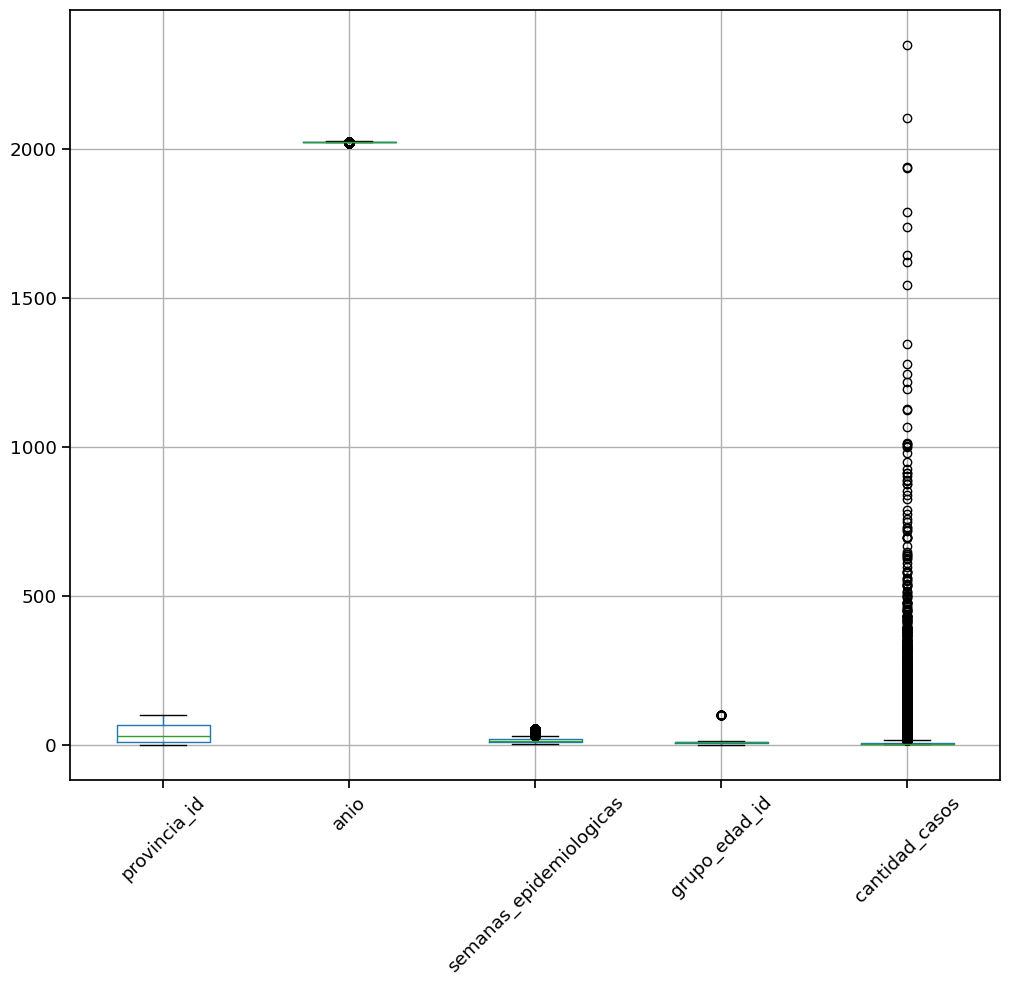

In [9]:
df.boxplot(figsize=(12, 10), rot=45)

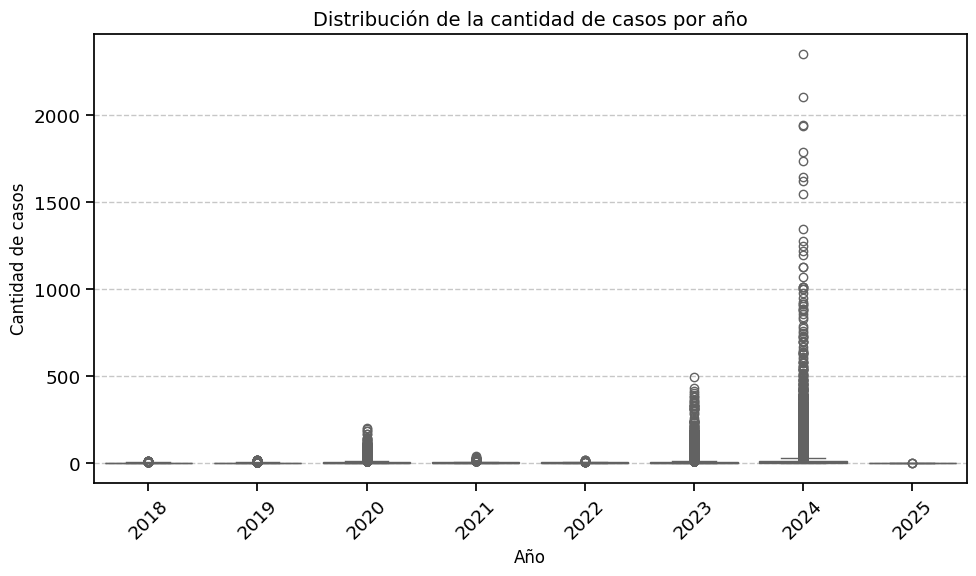

In [10]:
# Crear el boxplot comparativo
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='anio', y='cantidad_casos', palette="Set3")

# Personalizar la gráfica
plt.title('Distribución de la cantidad de casos por año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de casos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [11]:
valores_nulos_por_columna = df.isnull().sum()
print(f"cantidad de valores nulos: \n\n{valores_nulos_por_columna}")

cantidad de valores nulos: 

departamento_id            0
departamento_nombre        0
provincia_id               0
provincia_nombre           0
anio                       0
semanas_epidemiologicas    0
evento_nombre              0
grupo_edad_id              0
grupo_edad_desc            0
cantidad_casos             1
dtype: int64


### Filas repetidas

In [12]:
# Obtener las posiciones (índices) de los registros duplicados
posiciones_duplicados = df.index[df.duplicated()].tolist()

# Mostrar las posiciones de los duplicados
print("Posiciones de los registros duplicados:")
print(posiciones_duplicados)
print(f'la cantidad de duplicados son :{len(posiciones_duplicados)}')


Posiciones de los registros duplicados:
[756, 874, 1064, 1075, 1432, 1523, 1571, 1589, 1860, 11896, 11929, 12215, 12351, 12410, 12567, 13963, 13967, 13969, 13971, 14120, 17081, 17873, 18513, 21575, 22482, 25066, 27368, 31487, 32189, 32529, 33012, 33138, 33459, 34155, 41629, 41792, 43727, 63299, 63762]
la cantidad de duplicados son :39


In [13]:
filas_coincidentes = df.where((df == df.iloc[756])|(df == df.iloc[ 874])).dropna(how='any')
#filas_coincidentes = df.where((df == df.iloc[756])|(df == df.iloc[ 874])).dropna()
filas_coincidentes

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
753,22063,General Guemes,22.0,Chaco,2019.0,15.0,Dengue,7.0,De 20 a 24 anos,1.0
756,22063,General Guemes,22.0,Chaco,2019.0,15.0,Dengue,7.0,De 20 a 24 anos,1.0
859,38035,Ledesma,38.0,Jujuy,2019.0,23.0,Dengue,8.0,De 25 a 34 anos,1.0
874,38035,Ledesma,38.0,Jujuy,2019.0,23.0,Dengue,8.0,De 25 a 34 anos,1.0


In [14]:
# Mostrar registros duplicados
duplicados = df[df.duplicated()]
print("Registros duplicados encontrados:")
display(duplicados)

# Eliminar los registros duplicados
df_up= df.drop_duplicates()

# Mostrar el DataFrame actualizado
print("\nDataFrame después de eliminar duplicados:")
display(df_up)


Registros duplicados encontrados:


,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
756,22063,General Guemes,22,Chaco,2019,15,Dengue,7,De 20 a 24 anos,1.0
874,38035,Ledesma,38,Jujuy,2019,23,Dengue,8,De 25 a 34 anos,1.0
1064,54042,Eldorado,54,Misiones,2019,20,Dengue,4,De 5 a 9 anos,1.0
1075,54049,General Manuel Belgrano,54,Misiones,2019,21,Dengue,5,De 10 a 14 anos,1.0
1432,66056,Grl. Jose de San Martin,66,Salta,2019,22,Dengue,8,De 25 a 34 anos,1.0
1523,66126,Oran,66,Salta,2019,14,Dengue,6,De 15 a 19 anos,2.0
1571,66126,Oran,66,Salta,2019,14,Dengue,9,De 35 a 44 anos,2.0
1589,66126,Oran,66,Salta,2019,15,Dengue,10,De 45 a 65 anos,1.0
1860,82084,Rosario,82,Santa Fe,2019,15,Dengue,5,De 10 a 14 anos,1.0
11896,66007,Anta,66,Salta,2020,12,Dengue,11,Mayores de 65 anos,1.0



DataFrame después de eliminar duplicados:


,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
0,0,*sin dato*,6,Buenos Aires,2018,11,Dengue,10,De 45 a 64 años,1.0
1,035,Avellaneda,6,Buenos Aires,2018,7,Dengue,8,De 20 a 24 años,1.0
2,035,Avellaneda,6,Buenos Aires,2018,7,Dengue,10,De 45 a 64 años,1.0
3,035,Avellaneda,6,Buenos Aires,2018,9,Dengue,6,De 10 a 14 años,1.0
4,035,Avellaneda,6,Buenos Aires,2018,9,Dengue,8,De 20 a 24 años,1.0
...,...,...,...,...,...,...,...,...,...,...
67818,42,Pilagás,34,Formosa,2025,1,Dengue,12,Mayores de 65 años,1.0
67819,42,Pilagás,34,Formosa,2025,1,Dengue,9,De 25 a 34 años,1.0
67820,14,Formosa,34,Formosa,2025,1,Dengue,6,De 10 a 14 años,2.0
67821,35,Patiño,34,Formosa,2025,1,Dengue,8,De 20 a 24 años,2.0


In [15]:
df_delete=df_up[(df_up['departamento_nombre']=='desconocido')|(df_up['departamento_nombre']=='*sin dato*')]
print(df_delete.shape)
display(df_delete)

(1060, 10)


,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
0,0,*sin dato*,6,Buenos Aires,2018,11,Dengue,10,De 45 a 64 años,1.0
117,0,*sin dato*,2,CABA,2018,13,Dengue,10,De 45 a 64 años,1.0
118,0,*sin dato*,2,CABA,2018,14,Dengue,10,De 35 a 44 años,1.0
119,0,*sin dato*,2,CABA,2018,15,Dengue,10,De 35 a 44 años,1.0
120,0,*sin dato*,2,CABA,2018,18,Dengue,9,De 25 a 34 años,1.0
...,...,...,...,...,...,...,...,...,...,...
67670,999,desconocido,99,desconocida,2024,51,Dengue,6,De 10 a 14 años,1.0
67688,999,desconocido,99,desconocida,2024,49,Dengue,10,De 35 a 44 años,1.0
67718,999,desconocido,99,desconocida,2024,37,Dengue,2,Posneonato (29 hasta 365 dÍas),1.0
67722,999,desconocido,34,Formosa,2024,35,Dengue,6,De 10 a 14 años,1.0


In [18]:
df_filtrado[df_filtrado['provincia_nombre']=='(en blanco)']

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
11790,00,(en blanco),0,(en blanco),2020,6,Dengue,100,Sin Especificar,1.0
11791,00,(en blanco),0,(en blanco),2020,8,Dengue,9,De 35 a 44 anos,1.0
11792,00,(en blanco),0,(en blanco),2020,10,Dengue,100,Sin Especificar,1.0
11793,00,(en blanco),0,(en blanco),2020,19,Dengue,5,De 10 a 14 anos,1.0
11794,00,(en blanco),0,(en blanco),2020,24,Dengue,9,De 35 a 44 anos,1.0


In [17]:
# Realizar un anti-merge para filtrar los registros que no están en `df_subgrupo`
df_filtrado = df_up.merge(df_delete, how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)

# Mostrar el DataFrame filtrado
print("DataFrame después de eliminar los registros del subgrupo:")
print(df_filtrado.shape)
print(df_up.shape)


DataFrame después de eliminar los registros del subgrupo:
(66724, 10)
(67784, 10)


### Variable **quality**
Exploraremos y analizaremos los datos asociados con nuestra variable objetivo.

In [19]:
df_filtrado['anio'].value_counts()

,count
anio,
2024,34482
2023,17872
2020,11004
2019,1264
2021,1142
2018,654
2022,292
2025,14


El Data Frame tiene **1359** filas sin repetir y 12 columnas no contiene datos nulos, exite un gran diferencia entre el tercer percentil y el valor maximo en varias caracteristicas lo que puede indicar la presencia de datos atipicos, la variable quality es de tipo discreta y va de 3 a 8 y el valor que se repite mas es de 5.


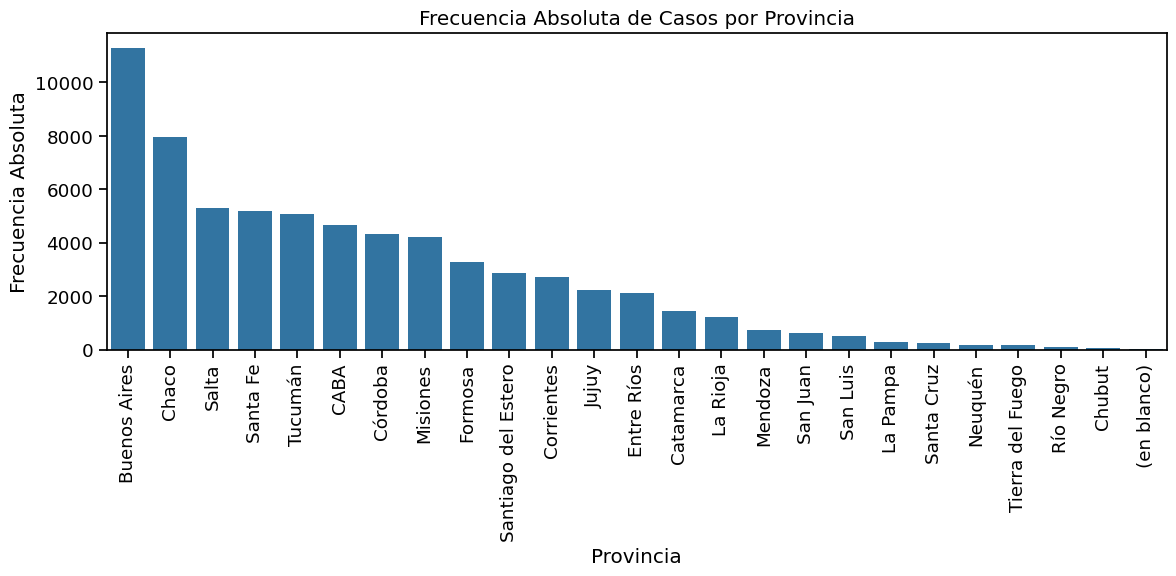

In [20]:
# Crear un gráfico de barras ordenado por frecuencia
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtrado, x='provincia_nombre', order=df_filtrado['provincia_nombre'].value_counts().index)

# Rotar las etiquetas del eje X para mayor claridad
plt.xticks(rotation=90)

# Agregar título y etiquetas a los ejes
plt.title('Frecuencia Absoluta de Casos por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Frecuencia Absoluta')

# Mostrar el gráfico
plt.tight_layout()  # Ajustar los márgenes para evitar solapamientos
plt.show()

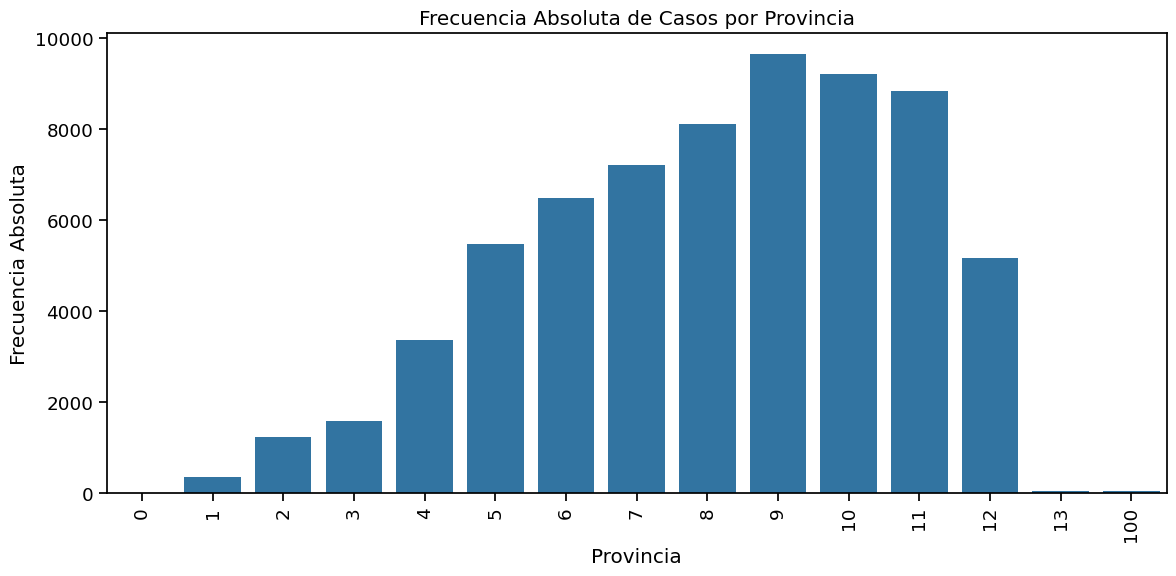

In [23]:
# Crear un gráfico de barras ordenado por frecuencia
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtrado, x='grupo_edad_id')#, order=df['grupo_edad_id'].value_counts().index)

# Rotar las etiquetas del eje X para mayor claridad
plt.xticks(rotation=90)

# Agregar título y etiquetas a los ejes
plt.title('Frecuencia Absoluta de Casos por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Frecuencia Absoluta')

# Mostrar el gráfico
plt.tight_layout()  # Ajustar los márgenes para evitar solapamientos
plt.show()

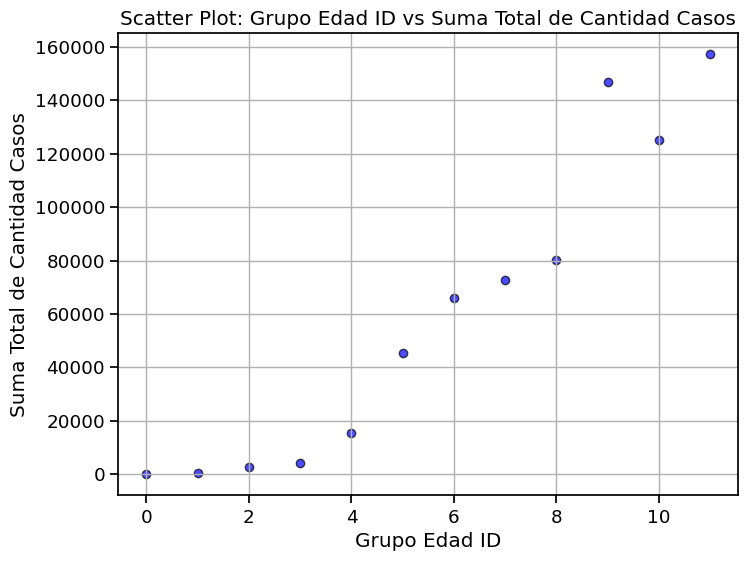

In [24]:
# Agrupar por 'grupo_edad_id' y sumar los valores de 'cantidad_casos'
data_grouped = df_filtrado[df_filtrado['grupo_edad_id']<=11].groupby('grupo_edad_id')['cantidad_casos'].sum()

# Extraer los valores para el scatter plot
x = data_grouped.index  # Valores únicos de 'grupo_edad_id'
y = data_grouped.values  # Suma total de 'cantidad_casos' por grupo_edad_id

# Graficar el scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.7, edgecolors='black')
plt.title('Scatter Plot: Grupo Edad ID vs Suma Total de Cantidad Casos')
plt.xlabel('Grupo Edad ID')
plt.ylabel('Suma Total de Cantidad Casos')
plt.grid(True)
plt.show()

In [25]:
#plt.scatter( x=df['semanas_epidemiologicas'], y=df['cantidad_casos'])
x = df_filtrado['grupo_edad_id'].loc[df_filtrado['grupo_edad_id'] <= 13]
y = df_filtrado['grupo_edad_id'].loc[df_filtrado['grupo_edad_id'] <= 13].value_counts()
print(x.shape,y.shape)
x=df_filtrado['grupo_edad_id'].loc[df_filtrado['grupo_edad_id'] <= 13].unique()
#plt.hist(  x)
#plt.scatter(x, y)

#plt.show()
y,x

(66680,) (14,)


(grupo_edad_id
 9     9636
 10    9211
 11    8844
 8     8098
 7     7209
 6     6478
 5     5462
 12    5163
 4     3355
 3     1587
 2     1227
 1      359
 13      49
 0        2
 Name: count, dtype: int64,
 array([ 8, 10,  6,  9, 11,  5,  4,  7,  2,  1, 12,  3,  0, 13]))

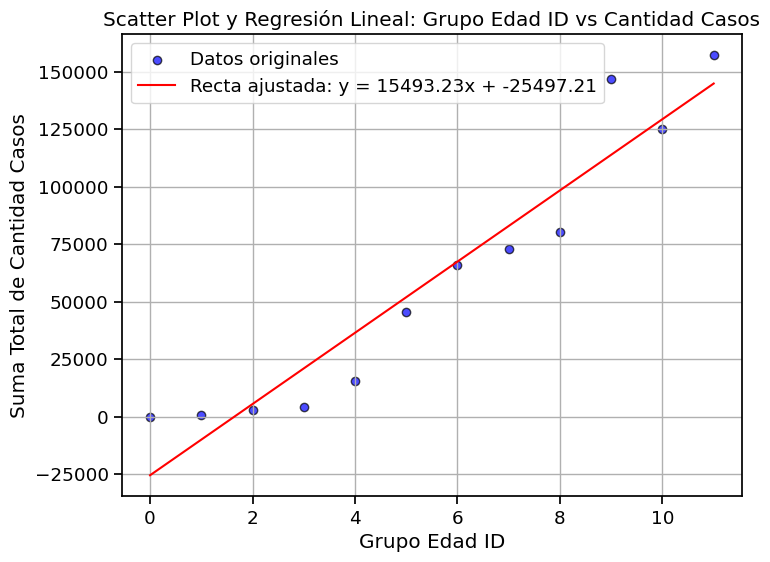

In [26]:
# Agrupar por 'grupo_edad_id' y sumar los valores de 'cantidad_casos'
data_grouped = df_filtrado[df_filtrado['grupo_edad_id'] <= 11].groupby('grupo_edad_id')['cantidad_casos'].sum()

# Extraer los valores para la regresión y scatter plot
x = data_grouped.index  # Valores únicos de 'grupo_edad_id'
y = data_grouped.values  # Suma total de 'cantidad_casos' por grupo_edad_id

# Realizar regresión lineal
coef = np.polyfit(x, y, 1)  # Ajustar una línea recta (grado 1)
poly1d_fn = np.poly1d(coef)  # Crear la función de la recta ajustada

# Graficar los datos originales (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.7, edgecolors='black', label='Datos originales')

# Graficar la recta ajustada
plt.plot(x, poly1d_fn(x), color='red', label=f'Recta ajustada: y = {coef[0]:.2f}x + {coef[1]:.2f}')

# Añadir etiquetas, título y leyenda
plt.title('Scatter Plot y Regresión Lineal: Grupo Edad ID vs Cantidad Casos')
plt.xlabel('Grupo Edad ID')
plt.ylabel('Suma Total de Cantidad Casos')
plt.legend()
plt.grid(True)
plt.show()

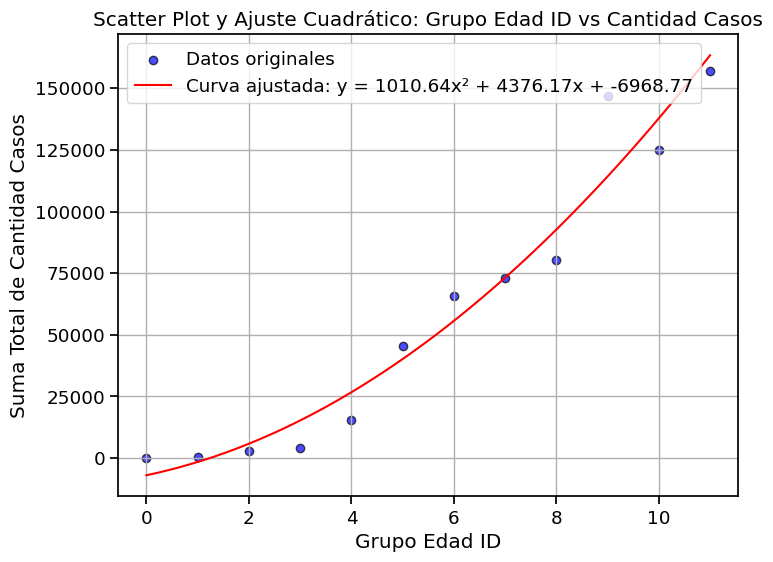

In [27]:
# Agrupar por 'grupo_edad_id' y sumar los valores de 'cantidad_casos'
data_grouped = df_filtrado[df_filtrado['grupo_edad_id'] <= 11].groupby('grupo_edad_id')['cantidad_casos'].sum()

# Extraer los valores para el ajuste y scatter plot
x = data_grouped.index  # Valores únicos de 'grupo_edad_id'
y = data_grouped.values  # Suma total de 'cantidad_casos' por grupo_edad_id

# Realizar ajuste cuadrático
coef = np.polyfit(x, y, 2)  # Ajustar un polinomio de grado 2
poly2d_fn = np.poly1d(coef)  # Crear la función de la curva ajustada

# Graficar los datos originales (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.7, edgecolors='black', label='Datos originales')

# Generar valores para la curva ajustada
x_curve = np.linspace(min(x), max(x), 500)  # Valores uniformemente espaciados en el rango de x
y_curve = poly2d_fn(x_curve)  # Calcular los valores de y usando el polinomio ajustado

# Graficar la curva ajustada
plt.plot(x_curve, y_curve, color='red', label=f'Curva ajustada: y = {coef[0]:.2f}x² + {coef[1]:.2f}x + {coef[2]:.2f}')

# Añadir etiquetas, título y leyenda
plt.title('Scatter Plot y Ajuste Cuadrático: Grupo Edad ID vs Cantidad Casos')
plt.xlabel('Grupo Edad ID')
plt.ylabel('Suma Total de Cantidad Casos')
plt.legend()
plt.grid(True)
plt.show()

### DataSet Original

La observación detallada revela que no existen observaciones significativas asociadas con vinos de baja calidad ni con vinos de alta calidad. Este hallazgo sugiere que la distribución de las calidades de vino se concentra en niveles intermedios.

In [ ]:
variables = list(df.columns)
variables = variables[:-1]
fig = plt.figure(figsize=(18, 20))
for index, variable in enumerate(variables):
    media = df[variable].mean()
    mediana = df[variable].median()
    moda = mode(df[variable])[0].item()
    plt.subplot(6, 2, index+1)
    sns.histplot(df[variable], kde=True)
    plt.axvline(media, color='y', linestyle='dashed', linewidth=2, label='Media')
    plt.axvline(mediana, color='r', linestyle='dashed', linewidth=2, label='Mediana')
    plt.axvline(moda, color='g', linestyle='dashed', linewidth=2, label='Moda')
fig.tight_layout(pad=1.0)

TypeError: can only concatenate str (not "int") to str

<Figure size 1800x2000 with 0 Axes>

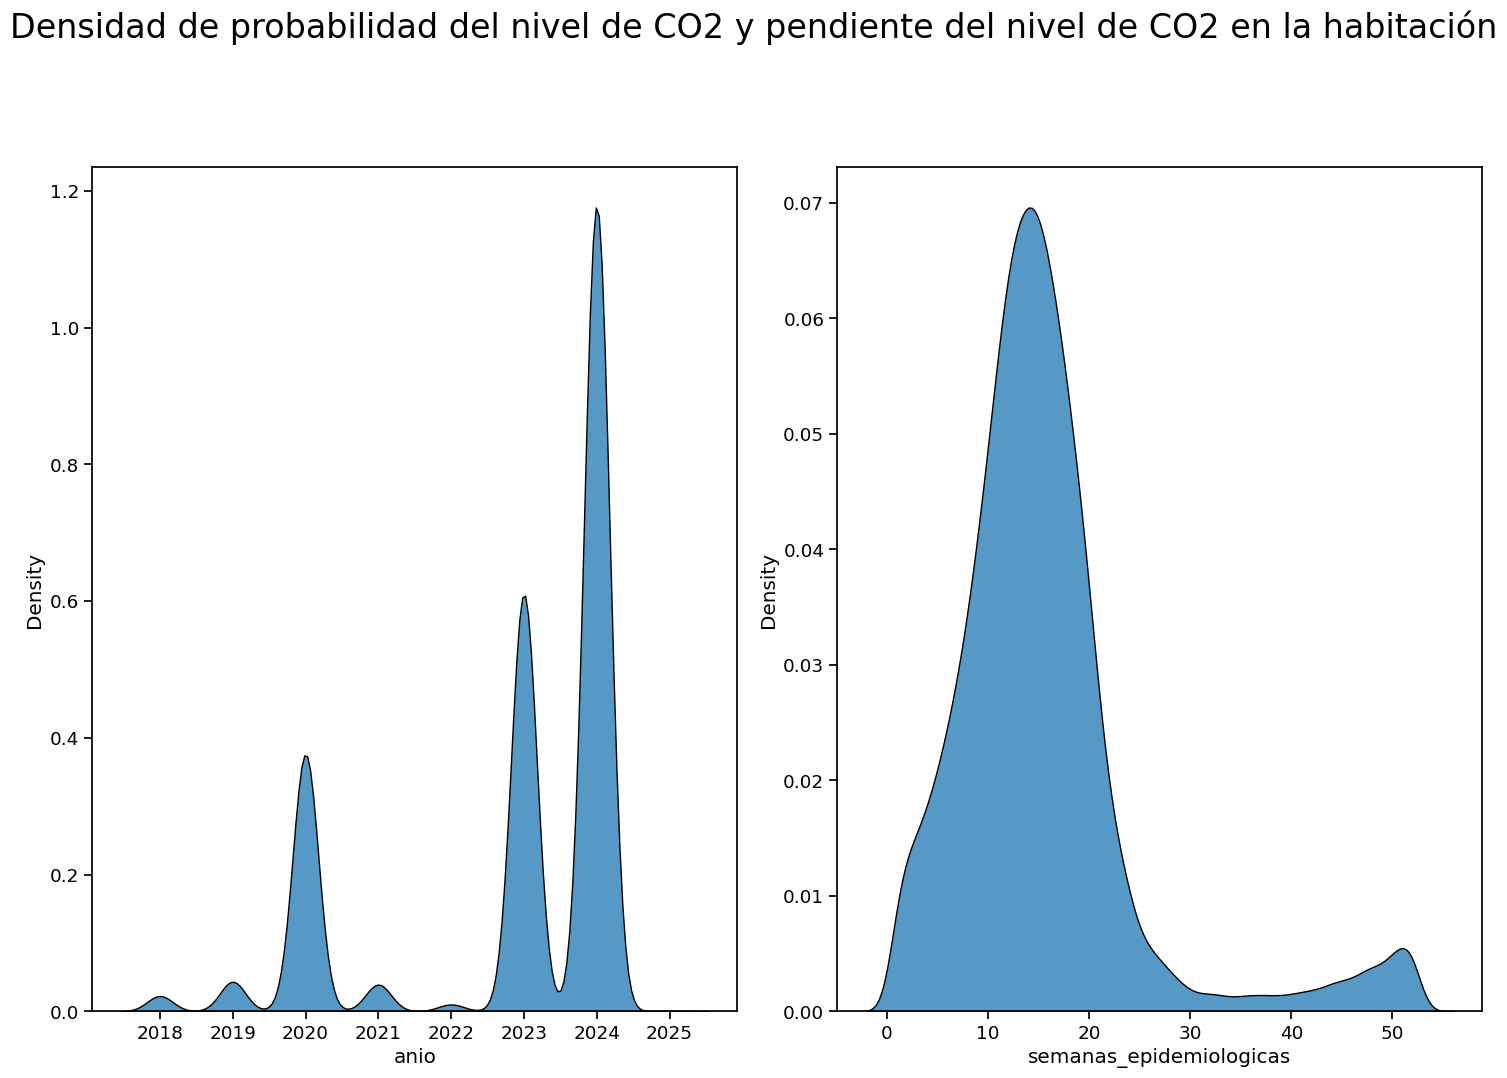

In [28]:
f, axs = plt.subplots(1, 2, figsize=(15, 10), gridspec_kw=dict(width_ratios=[1, 1]))
f.suptitle('Densidad de probabilidad del nivel de CO2 y pendiente del nivel de CO2 en la habitación', fontsize=24, y=1.08)
sns.kdeplot(data=df_filtrado, x="anio", multiple="stack", ax=axs[0])
sns.kdeplot(data=df_filtrado, x="semanas_epidemiologicas", multiple="stack", ax=axs[1])
f.tight_layout()

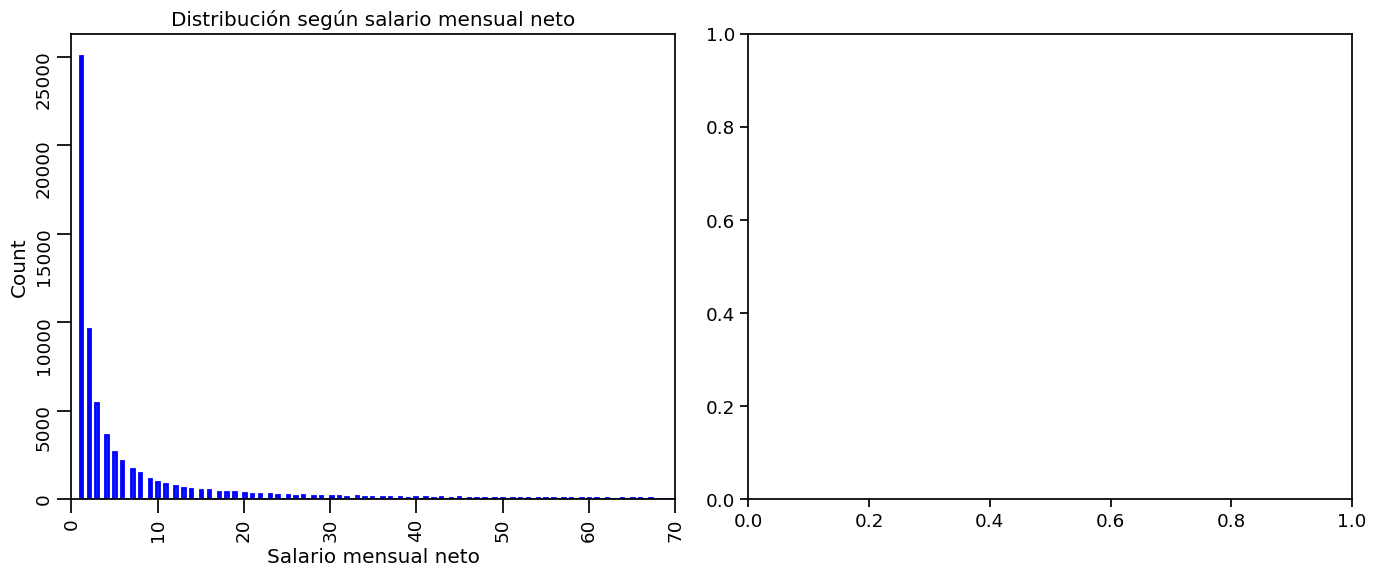

In [29]:
# Crear una figura y subtramas con una fila y dos columnas
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df_filtrado['cantidad_casos'], color='cyan', edgecolor='blue', linewidth=2, ax=axs[0])
axs[0].ticklabel_format(style='plain', axis='x')
axs[0].set_xlim(0, 70)
axs[0].set_xlabel('Salario mensual neto')
axs[0].set_title('Distribución según salario mensual neto')
axs[0].tick_params(labelrotation=90, size=10)

# Ajustar el diseño de las subtramas
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [30]:
#plt.scatter( x=df['semanas_epidemiologicas'], y=df['cantidad_casos'])
x = df_filtrado['cantidad_casos'].loc[df_filtrado['cantidad_casos'] > 70]
y = df_filtrado['cantidad_casos'].loc[df_filtrado['cantidad_casos'] > 70].value_counts()
print(x.shape,y.shape)
#x=df['grupo_edad_id'].loc[df['grupo_edad_id'] <= 13].unique()
#plt.hist(  x)
#plt.scatter(x, y)

#plt.show()
y,x

(2100,) (356,)


(cantidad_casos
 76.0      45
 71.0      45
 73.0      45
 77.0      37
 74.0      35
           ..
 1012.0     1
 999.0      1
 648.0      1
 1787.0     1
 759.0      1
 Name: count, Length: 356, dtype: int64,
 1980      83.0
 2000      86.0
 2007      71.0
 2008     111.0
 2009      99.0
          ...  
 67411    141.0
 67413    248.0
 67414    181.0
 67417    240.0
 67421    759.0
 Name: cantidad_casos, Length: 2100, dtype: float64)

In [31]:
x = df_filtrado.loc[df_filtrado['cantidad_casos'] > 70]
x

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
1980,02001,COMUNA 1,2,CABA,2020,11,Dengue,10,De 45 a 65 anos,83.0
2000,02001,COMUNA 1,2,CABA,2020,13,Dengue,10,De 45 a 65 anos,86.0
2007,02001,COMUNA 1,2,CABA,2020,14,Dengue,7,De 20 a 24 anos,71.0
2008,02001,COMUNA 1,2,CABA,2020,14,Dengue,8,De 25 a 34 anos,111.0
2009,02001,COMUNA 1,2,CABA,2020,14,Dengue,9,De 35 a 44 anos,99.0
...,...,...,...,...,...,...,...,...,...,...
67411,84,Capital,90,Tucumán,2024,11,Dengue,12,Mayores de 65 años,141.0
67413,84,Capital,90,Tucumán,2024,12,Dengue,5,De 5 a 9 años,248.0
67414,84,Capital,90,Tucumán,2024,15,Dengue,5,De 5 a 9 años,181.0
67417,84,Capital,90,Tucumán,2024,15,Dengue,7,De 15 a 19 años,240.0


## Preguntas a respodner:

1.**¿Cómo podemos mejorar la calidad del vino?**

### Preguntas Secundarias
1. ¿Cuáles son los factores que más influyen en la calidad del vino según este conjunto de datos?

2. ¿Existe una relación lineal o no lineal entre las variables químicas y la calidad del vino?